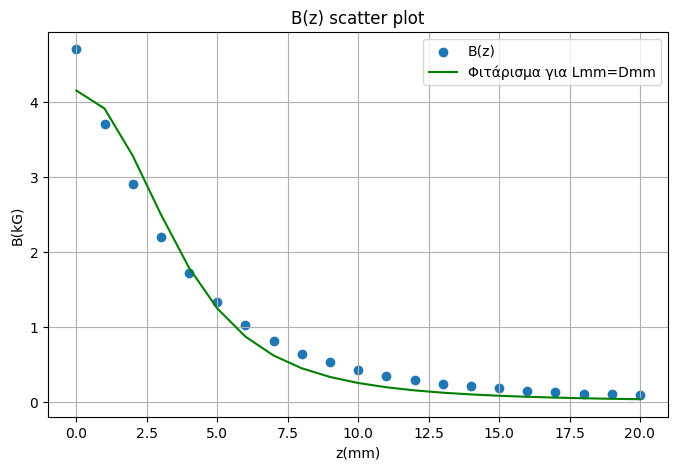

array([9.27972807, 4.00221988])

In [2]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Δεδομένα 
x_data = np.arange(21)
y_data = np.array([4.7, 3.7, 2.9, 2.2, 1.72, 1.33, 1.03, 0.81, 0.64, 0.53, 0.42, 0.34, 0.29, 0.24, 0.21, 0.18, 0.15, 0.13, 0.11, 0.1, 0.09])

# Ορισμός μαγνητικού πεδίου 
def model(x, a, b, c):
    return (a / 2) * (((x + (b / 2)) / (np.sqrt((x + (b / 2))**2 + c**2))) - ((x - (b / 2)) / (np.sqrt((x - (b / 2))**2 + c**2))))

#params, params_covariance = curve_fit(model, x_data, y_data, p0=[1, 1, 1])

# Προσαρμογή του μοντέλου για b = c
def model_b_equals_c(x, a, b):
    return (a / 2) * (((x + (b / 2)) / (np.sqrt((x + (b / 2))**2 + b**2))) - ((x - (b / 2)) / (np.sqrt((x - (b / 2))**2 + b**2))))

params_b_equals_c, params_covariance_b_equals_c = curve_fit(model_b_equals_c, x_data, y_data, p0=[1, 1])

# Σχεδιασμός των δεδομένων και της προσαρμοσμένης καμπύλης με b = c
plt.figure(figsize=(8, 5))
plt.scatter(x_data, y_data, label='B(z)')
plt.plot(x_data, model_b_equals_c(x_data, *params_b_equals_c), label='Φιτάρισμα για Lmm=Dmm', color='green')
plt.legend()
plt.xlabel('z(mm)')
plt.ylabel('B(kG)')
plt.title('B(z) scatter plot')
plt.grid(True)
plt.show()

# Επιστροφή των παραμέτρων της προσαρμογής με b = c
params_b_equals_c


In [ ]:
from sympy import symbols, diff, sqrt

# Ορισμός των συμβόλων
x, a, b = symbols('x a b')

# Ορισμός της συνάρτησης με τις βρεθείσες τιμές για a και b=c
function = (a / 2) * (((x + (b / 2)) / (sqrt((x + (b / 2))**2 + b**2))) - ((x - (b / 2)) / (sqrt((x - (b / 2))**2 + b**2))))

# Αντικατάσταση των βρεθεισών τιμών στη συνάρτηση
function_substituted = function.subs({a: 9.27972807, b: 4.00221988})

# Υπολογισμός της παραγωγού της συνάρτησης
derivative = diff(function_substituted, x)

# Σχεδιασμός της συνάρτησης και της παραγωγού της
x_values = np.linspace(2.5, 30, 400)
f_values = [function_substituted.subs(x, xv).evalf() for xv in x_values]
df_values = [derivative.subs(x, xv).evalf() for xv in x_values]

plt.figure(figsize=(10, 6))
plt.plot(x_values, f_values, label='B(z)', color='blue')
plt.plot(x_values, df_values, label='B\'(z)', color='red')
plt.title('Αναλυτικό γράφημα B(z) και παραγωγόγου από το κέντρο του μαγνήτη 2.5mm (h=5mm)')
plt.xlabel('x')
plt.ylabel('B(z) και B\'(z)')
plt.legend()
plt.grid(True)
plt.show()

# Επιστροφή της υποκατεστημένης συνάρτησης και της παραγωγού της
function_substituted, derivative
